In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gc

from psutil import virtual_memory
from os import scandir

In [2]:
folder = "../../Deidentified-Raw-Waveforms/"
file1 = "raw_waves_data_2a.csv"
file2 = "raw_waves_data_2b.csv"
file3 = "raw_waves_data_2c.csv"
file4 = "raw_waves_data_2d.csv"
file5 = "raw_waves_data_2e.csv"
coldict = {
    "raw_waves_data_2a.csv": ["257", "258"], 
    "raw_waves_data_2b.csv": ["258"], 
    "raw_waves_data_2c.csv": ["257"], 
    "raw_waves_data_2d.csv": ["257", "258"], 
    "raw_waves_data_2e.csv": ["257", "258"]
}

In [3]:
df = pd.read_csv(folder+file1, usecols=coldict[file1])

In [4]:
virtual_memory()

svmem(total=12655771648, available=5692121088, percent=55.0, used=6963650560, free=5692121088)

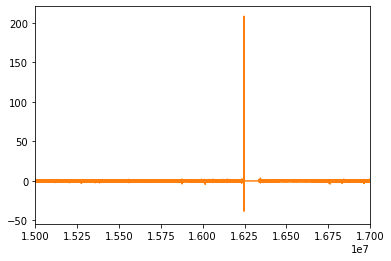

svmem(total=12655771648, available=6587777024, percent=47.9, used=6067994624, free=6587777024)

In [6]:
plt.figure()
plt.plot(df["257"])
plt.plot(df["258"])

plt.xlim(1.5e7, 1.7e7)
#plt.ylim(-4, 4)

plt.show()

gc.collect()
virtual_memory()

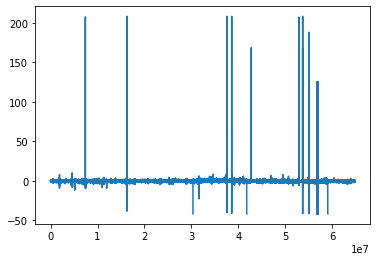

2412

In [21]:
full_signal = df["257"]
full_signal = full_signal.combine_first(df["258"])
plt.plot(full_signal)

plt.show()
plt.close()
gc.collect()

In [22]:
virtual_memory()

svmem(total=12655771648, available=6819495936, percent=46.1, used=5836275712, free=6819495936)

In [24]:
del df
gc.collect()
virtual_memory()

svmem(total=12655771648, available=7799787520, percent=38.4, used=4855984128, free=7799787520)

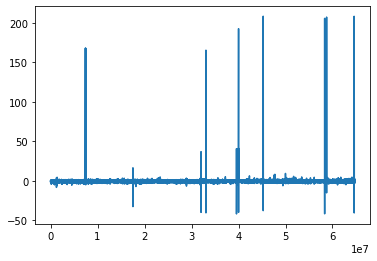

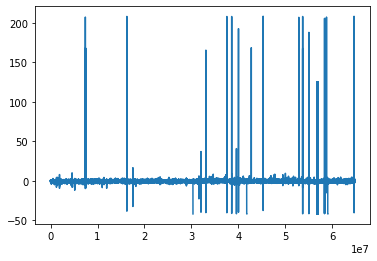

svmem(total=12655771648, available=9144213504, percent=27.7, used=3511558144, free=9144213504)

In [26]:
df = pd.read_csv(folder + file2, usecols=coldict[file2])
full_signal = full_signal.append(df["258"])

plt.plot(df["258"])
plt.show()
plt.close()

plt.plot(full_signal)
plt.show()
plt.close()

del df
gc.collect()
virtual_memory()

MemoryError: Unable to allocate 4.82 GiB for an array with shape (323246786, 2) and data type float64

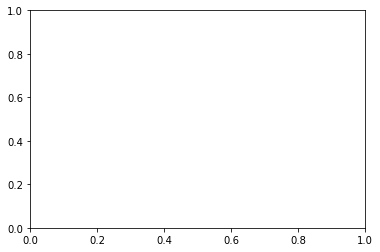

In [27]:
files = [file3, file4, file5]
for file in files:
    # Load in the dataframe
    cols = coldict[file]
    df = pd.read_csv(folder+file, usecols=cols)
    
    # Piece together the enxt segment of the signal
    next_signal = df[cols[0]]
    i=1
    while True:
        try:
            next_signal = next_signal.combine_first(df[ cols[i] ])
            i+=1
        except IndexError:
            break
    
    del df; gc.collect()
    full_signal = full_signal.append(next_signal)

plt.plot(full_signal)
plt.close()
gc.collect()


In [28]:
virtual_memory()

svmem(total=12655771648, available=6225039360, percent=50.8, used=6430732288, free=6225039360)

In [29]:
full_signal

0          -0.1489
1          -0.1489
2          -0.1489
3          -0.1693
4          -0.1999
             ...  
64523940   -0.3223
64523941   -0.3172
64523942   -0.3019
64523943   -0.2968
64523944   -0.2968
Length: 323246786, dtype: float64